
# **Principal Component Analysis (PCA)**

Principal Component Analysis (PCA) is a dimensionality reduction technique which aims to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original variance as possible. This is achieved by identifying and selecting the principal components, which are linear combinations of the original features.




## How Does PCA Work?

1. **Standardizing Data:**
   - Before applying PCA, it's common to standardize the data to have zero mean and unit variance.

2. **Calculating Covariance Matrix:**
   - PCA calculates the covariance matrix of the standardized data. This matrix shows how different features change together.

3. **Eigenvalue and Eigenvector Calculation:**
   - PCA finds the eigenvalues and eigenvectors of the covariance matrix. Eigenvalues represent the variance of the data along the eigenvector directions.

4. **Choosing Principal Components:**
   - The eigenvectors with the highest eigenvalues are the principal components. These components capture the most variation in the data.

5. **Transforming Data:**
   - The original data is then transformed into a new space using these principal components.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


In [2]:
# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Standardize the data (optional but recommended)
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [3]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)


In [4]:
# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [4.37827907e-01 2.39171089e-01 1.90765616e-01 1.32235388e-01
 1.20881184e-32]


### Visualizations:

The code above generates a plot showing the cumulative explained variance by the principal components. This helps in determining the optimal number of components to retain.


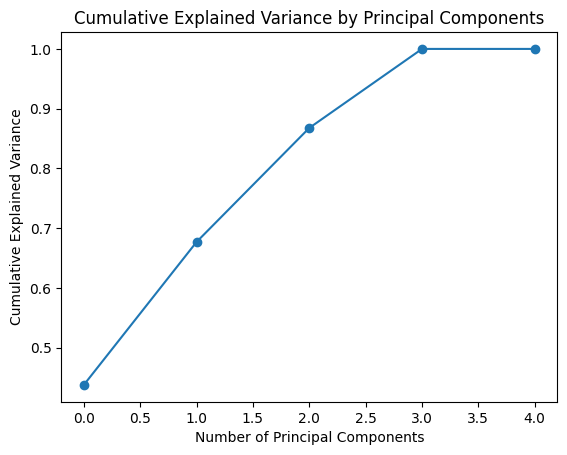

In [5]:
# Plot the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


## Use Cases:

- **Dimensionality Reduction:** PCA is often used to reduce the number of features in a dataset, which is beneficial for improving model training efficiency and reducing overfitting.

- **Visualization:** PCA can be used for visualizing high-dimensional data in two or three dimensions. It's especially useful for identifying patterns and clusters.

- **Noise Reduction:** By retaining only the principal components that capture the most variance, PCA can help filter out noise in the data.

- **Feature Engineering:** PCA can be used as a feature engineering technique by selecting the most important components to represent the data.

- **Data Compression:** In scenarios where storage is a concern, PCA can be employed to compress data while preserving its essential characteristics.

- **Face Recognition:**
  - PCA is used to represent faces in a way that emphasizes the differences between them, facilitating face recognition.

- **Speech Recognition:**
  - In speech processing, PCA can reduce the dimensionality of the feature space while preserving important information.

- **Finance:**
  - PCA is applied in finance to identify underlying factors influencing stock prices and portfolio optimization.

- **Image Compression:**
  - PCA can be used to compress images by representing them with a smaller set of principal components.


Remember that the choice of the number of principal components depends on the desired level of explained variance and the specific requirements of the problem at hand.

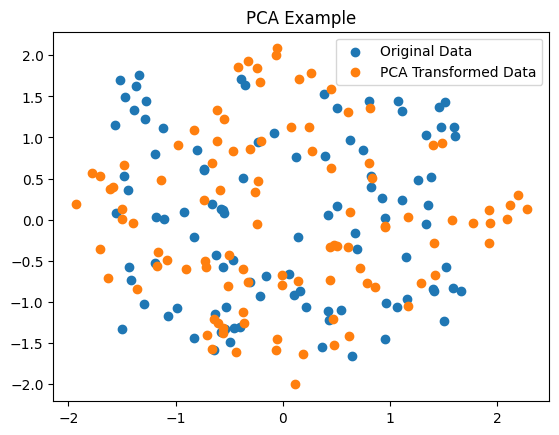

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Creating a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features

# Standardizing data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plotting original and transformed data
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], label='Original Data')
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='PCA Transformed Data')
plt.legend()
plt.title('PCA Example')
plt.show()

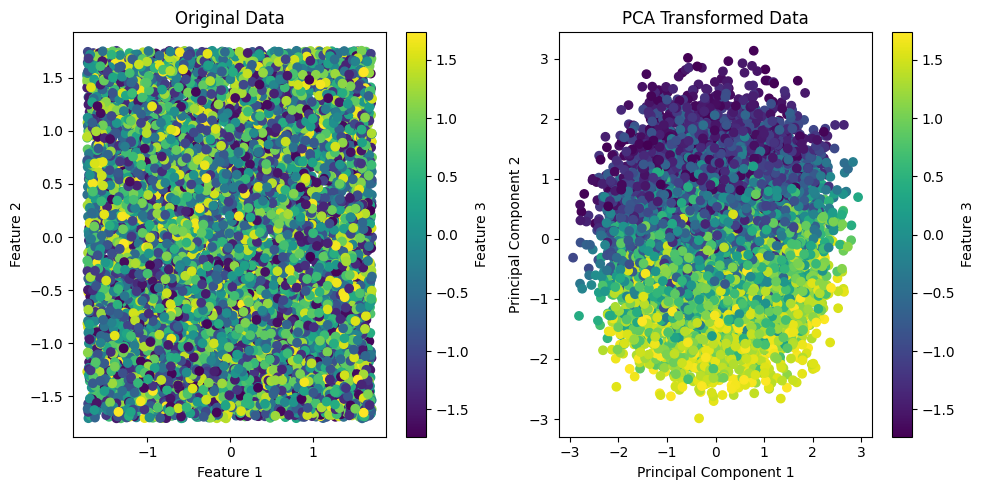

In [16]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Creating a synthetic house price prediction dataset
np.random.seed(42)
# Generating data with 100 samples and 3 features (representing different characteristics of houses)
X = np.random.rand(10000, 5)

# Standardizing data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plotting original and transformed data
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=X_standardized[:, 2], cmap='viridis', label='Original Data')
plt.colorbar(label='Feature 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')

# PCA Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_standardized[:, 2], cmap='viridis', label='PCA Transformed Data')
plt.colorbar(label='Feature 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')

plt.tight_layout()
plt.show()


It is important to note that - Standardizing data and scaling data are related concepts, but they are not exactly the same. Both processes aim to bring the data to a comparable scale, but the methods and outcomes can differ.

1. **Standardizing Data:**
   - In standardization, each feature is scaled to have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean of the feature from each data point and then dividing by the standard deviation.
   - The formula for standardizing a feature \(X\) is: \[ X_{\text{standardized}} = \frac{(X - \text{mean}(X))}{\text{std}(X)} \]
   - Standardization is useful when features have different units or when the data follows a normal distribution. It is a common preprocessing step for algorithms like PCA (Principal Component Analysis).

2. **Scaling Data:**
   - Scaling, on the other hand, is a broader term that refers to bringing the values of all features to a similar scale. It doesn't necessarily enforce a mean of 0 and standard deviation of 1.
   - Scaling could involve other methods like min-max scaling, where the data is scaled to a specific range (e.g., between 0 and 1).
   - The formula for min-max scaling is: \[ X_{\text{scaled}} = \frac{(X - \text{min}(X))}{\text{max}(X) - \text{min}(X)} \]
   - Scaling is often applied when the magnitude of the features is crucial, and algorithms like k-nearest neighbors might be sensitive to different feature scales.

In summary, standardizing data is a specific form of scaling that transforms the data to have a mean of 0 and a standard deviation of 1. Scaling, in a more general sense, refers to adjusting the range of values for each feature, and it can involve various methods, including standardization. The choice between standardization and other scaling methods depends on the characteristics of the data and the requirements of the specific machine learning algorithm being used.